In [1]:
import sys

In [2]:
sys.path.insert(1,'../src')
#sys.path.insert(1,'../src/ITE-1.1_code')

In [3]:
#from latentNoise_funcs_gen   import *

In [4]:

from funcs_LNC import *
from funcs_LNC_lin import *
from processResults import * 

2023-09-29 18:44:20,059:INFO:NumExpr defaulting to 8 threads.


In [5]:
sm.__version__

'0.13.2'

In [6]:
jax.__version__

'0.1.73'

In [7]:
import jaxlib
jaxlib.__version__

'0.1.51'

In [8]:
import matplotlib.pyplot as plt

In [9]:
x = onp.random.normal(size=1000, scale=0.1)[:,None]
z = onp.random.uniform(size=1000, low=-3.14, high=3.14)[:,None]
y = 5*x + 3*z#onp.sin(z)
y.shape

(1000, 1)

In [10]:
X = onp.hstack([x,z])
X2 = onp.hstack([x,y])
ws = np.ones(X.shape[1])

In [11]:
lam = np.array(0.001)
statss = linRegCoefStat(lam, X, y, ws)
statss

DeviceArray([ 2267.77 , 24424.686], dtype=float32)

In [12]:
transformer = FastICA(n_components=10,random_state=0,whiten='unit-variance')
X_transformed = transformer.fit_transform(X2)
X_transformed.shape

/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:470: UserWarning: n_components is too large: it will be set to 2
  % n_components


(1000, 2)

In [13]:
X[:,0][:,None].shape

(1000, 1)

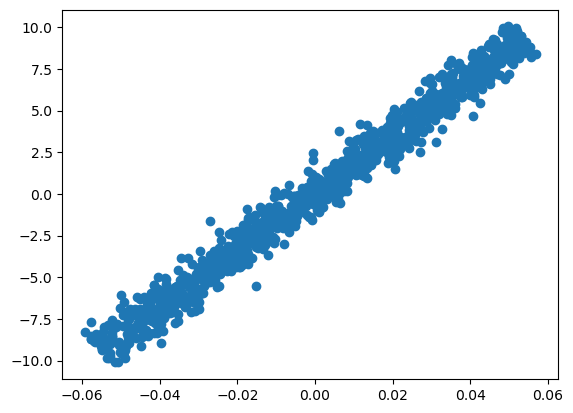

In [14]:
plt.scatter(X_transformed[:,0][:,None],y)

In [15]:
X3 = sm.add_constant(X_transformed[:,1][:,None])
est = sm.OLS(y, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     22.69
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           2.18e-06
Time:                        18:44:21   Log-Likelihood:                -3105.1
No. Observations:                1000   AIC:                             6214.
Df Residuals:                     998   BIC:                             6224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1102      0.171      0.645      0.5

In [16]:
est2.f_pvalue

2.181043338609213e-06

In [17]:
est2.pvalues

array([0.519, 0.   ])

In [18]:
pvalsy = [sm.OLS(y, sm.add_constant(X_transformed[:,i][:,None])).fit().f_pvalue for i in range(X_transformed.shape[1])]
pvalsx = [sm.OLS(x, sm.add_constant(X_transformed[:,i][:,None])).fit().f_pvalue for i in range(X_transformed.shape[1])]

In [19]:
pvalsy

[0.0, 2.181043338609213e-06]

In [20]:
pvalsx

[0.028287575427144038, 0.0]

In [21]:
#pvalsx = [1, 2]
#pvalsy = [3, 4]

In [22]:
pvals = np.array([pvalsx, pvalsy])

In [23]:
sumpvals = onp.apply_along_axis(np.sum, 0, pvals)
sumpvals

array([0.028, 0.   ], dtype=float32)

In [24]:
onp.argmin(sumpvals)

1

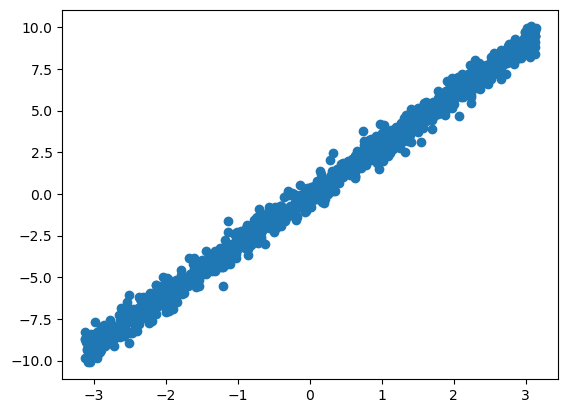

In [25]:
plt.scatter(z, y)

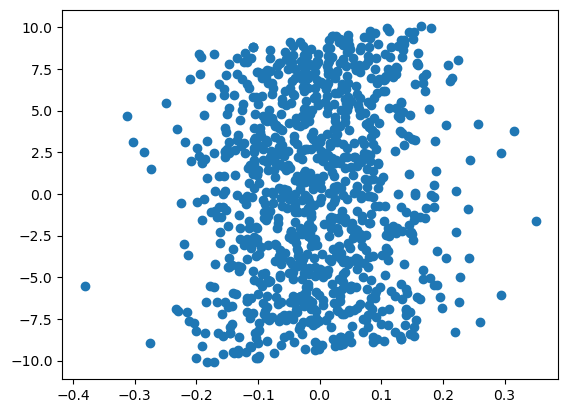

In [26]:
plt.scatter(x, y)

In [27]:
X = np.array(X)
x = np.array(x)
y = np.array(y)
n = x.shape[0]
p = X.shape[1]
ws = np.ones(p)

In [28]:
lam = np.array(0.001)


beta, resids, y_hat = rrModel(lam, X, y, ws)

In [29]:
resids.shape

(1000, 1)

In [30]:
beta

DeviceArray([[5.],
             [3.]], dtype=float32)

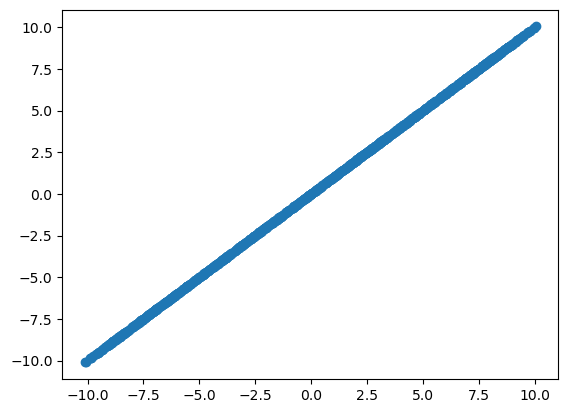

In [31]:
plt.scatter(y, y_hat)

In [32]:
np.dot(X, beta)

DeviceArray([[ -3.934],
             [ -9.749],
             [ -3.082],
             [ -1.023],
             [ -8.84 ],
             [ -0.222],
             [  7.995],
             [  7.427],
             [ -4.627],
             [ -2.207],
             [ -1.049],
             [ -7.026],
             [ -9.126],
             [  6.755],
             [ -4.621],
             [ -6.192],
             [  3.257],
             [ -4.999],
             [ -6.08 ],
             [  8.235],
             [  4.823],
             [ -7.099],
             [ -7.331],
             [  4.117],
             [ -9.322],
             [ -3.991],
             [  2.001],
             [ -8.559],
             [ -3.211],
             [  0.438],
             [ -2.562],
             [ -2.315],
             [  9.528],
             [ -3.36 ],
             [ -5.538],
             [ -9.044],
             [ -1.468],
             [  3.237],
             [ -7.665],
             [  6.684],
             [  8.142],
             [ -

## optimize for hyperparameter choice

In [33]:
# beta: np.ndarray, neta: np.ndarray,  lam: np.ndarray, lu: np.ndarray
beta = np.array(1.0) # mse
neta = np.array(1.0) # indep zs
lam = np.array(0.01) # krr
nu = np.array(1.0) # z norm
lu = np.array(0.0) # hsic(xy, zc)
pars = (beta, neta, lam, nu, lu)  


In [34]:
# read file
import pandas as pd
#folder = "/home/emiliano/Documents/ISP/postdoc/discoveringLatentConfounders/data/data_to_try/13:45:44_14092023/"
#file = "5_exponential1gaussian1_dependent_10_1_100.csv"
folder = "/home/emiliano/Documents/ISP/postdoc/discoveringLatentConfounders/data/data_noisyproxy2/"
file = "rep1_gaussian1exponential1_independent_20_1_50_50.csv"
file = "rep47_gaussian1uniform1_independent_20_1_1000_1000.csv"

In [35]:
files = os.listdir(folder)
files

['rep5_gaussian1uniform1_independent_20_1_1000_500.csv',
 'rep25_gaussian1uniform1_independent_20_1_1000_10.csv',
 'rep55_gaussian1gaussian1_independent_20_1_1000_500.csv',
 'rep24_gaussian1gaussian1_independent_20_1_1000_10.csv',
 'rep62_gaussian1uniform1_independent_20_1_1000_10.csv',
 'rep70_gaussian1uniform1_independent_20_1_1000_100.csv',
 'rep28_gaussian1gaussian1_independent_20_1_1000_500.csv',
 'rep47_gaussian1uniform1_independent_20_1_1000_500.csv',
 'rep21_gaussian1exponential1_independent_20_1_1000_100.csv',
 'rep54_gaussian1gaussian1_independent_20_1_1000_1000.csv',
 'rep65_gaussian1exponential1_independent_20_1_1000_10.csv',
 'rep70_gaussian1exponential1_independent_20_1_1000_100.csv',
 'rep46_gaussian1exponential1_independent_20_1_1000_100.csv',
 'rep84_gaussian1uniform1_independent_20_1_1000_10.csv',
 'rep30_gaussian1exponential1_independent_20_1_1000_1000.csv',
 'rep32_gaussian1exponential1_independent_20_1_1000_500.csv',
 'rep16_gaussian1uniform1_independent_20_1_1000_

In [36]:
file = files[2]
file

'rep55_gaussian1gaussian1_independent_20_1_1000_500.csv'

In [37]:
#file = "rep57_gaussian1exponential1_independent_20_1_50_1000.csv"

In [38]:
x, y, Z, U, meta, idxs, beta_real, stds = readFile(folder, file)

In [39]:
meta["latents"]

20

In [40]:
meta["size"]

500

In [41]:
transformer = FastICA(n_components=meta["latents"],random_state=0,whiten='unit-variance')
X_transformed = transformer.fit_transform(onp.array(U))
pvalsy = [sm.OLS(onp.array(y), sm.add_constant(onp.hstack([x, X_transformed[:,i][:,None]]))).fit().pvalues[2] for i in range(X_transformed.shape[1])]
pvalsx = [sm.OLS(onp.array(x), sm.add_constant(X_transformed[:,i][:,None])).fit().pvalues[1] for i in range(X_transformed.shape[1])]
pvals = np.array([pvalsx, pvalsy])
sumpvals = onp.apply_along_axis(np.sum, 0, pvals)
indxMin = onp.argmin(sumpvals)
sumpvals[indxMin]
pvals[:,indxMin]

/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


DeviceArray([0., 0.], dtype=float32)

In [42]:
U.shape

(500, 1000)

In [43]:
np.ones(5).shape

(5,)

In [44]:
X_transformed.shape

(500, 20)

In [45]:
indxMin

1

In [46]:
meta

{'rep': '100',
 'latents': 20,
 'confounder': 1,
 'proxy': 1000,
 'dist': 'gaussian',
 'distsd': '1',
 'noise': 'gaussian',
 'noisesd': 1.0,
 'independent': True,
 'noiseproxy': 1,
 'outdir': 'data_noisyproxy2',
 'ncl': 1,
 'size': 500,
 'ix': [9, 5, 18, 8, 4, 19],
 'iy': [2, 1, 13, 16, 3, 10],
 'ic': 20,
 'causal_coeff': 1.28520154347643,
 'coefx': [1.30660433368757,
  0.594351336127147,
  1.4071696435567,
  0.543512439820915,
  1.07543691410683,
  1.47539009526372,
  0.742164299124852],
 'coefy': [1.03866463666782,
  1.43202139018103,
  1.06534445844591,
  0.845704484265298,
  0.739768077386543,
  0.602315629832447,
  1.30118575179949]}

In [47]:
idx_all = onp.arange(0, X_transformed.shape[1])
idx_rest  = list(set(idx_all).difference(set([indxMin])))
print(idx_rest)


[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [48]:
pvals_resty = sm.OLS(onp.array(y), sm.add_constant(onp.hstack([x, X_transformed[:,indxMin][:,None] ,X_transformed[:,idx_rest]] ))).fit().pvalues
pvals_resty = pvals_resty[3:(pvals_resty.shape[0])]

pvals_restx = sm.OLS(onp.array(x), sm.add_constant(onp.hstack([X_transformed[:,indxMin][:,None] ,X_transformed[:,idx_rest]] ))).fit().pvalues
pvals_restx = pvals_restx[2:(pvals_restx.shape[0])]

print("pvals_restx: ", pvals_restx)
print("pvals_resty: ", pvals_resty)

#idx_y_c, = onp.where( (pvals_resty<pvals_restx)&(pvals_resty<0.05)&(pvals_restx>0.2))
idx_y_c, = onp.where( (pvals_resty<0.05))
idx_y_c = onp.array(idx_rest)[idx_y_c]
print(idx_y_c)
#idx_x_c, = onp.where( (pvals_resty>pvals_restx)&(pvals_restx<0.05)&(pvals_resty>0.2))
idx_x_c, = onp.where((pvals_restx<0.05))
idx_x_c = onp.array(idx_rest)[idx_x_c]
print(idx_x_c)
print(set(idx_x_c).intersection(idx_y_c))

X_transformed_x = X_transformed[:,idx_x_c]
X_transformed_y = X_transformed[:,idx_y_c]
p_x = X_transformed_x.shape[1]
p_y = X_transformed_y.shape[1]

ymodel = sm.OLS(onp.array(y), sm.add_constant(onp.hstack([x, X_transformed[:,indxMin][:,None] ,X_transformed_y] ))).fit()
alpha_y_ini = ymodel.params[3:(ymodel.params.shape[0])]

X_transformed_x2 = sm.add_constant(onp.hstack([X_transformed[:,indxMin][:,None] ,X_transformed_x] ))
print(X_transformed_x2.shape)
xmodel = sm.OLS(onp.array(y), X_transformed_x2).fit()
alpha_x_ini = xmodel.params[2:(xmodel.params.shape[0])]

zx_ini = (X_transformed_x@alpha_x_ini)[:,None]
zy_ini = (X_transformed_y@alpha_y_ini)[:,None]




pvals_restx:  [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.244 0.
 0.055 0.    0.    0.    0.    0.    0.003]
pvals_resty:  [0.    0.    0.    0.324 0.    0.    0.419 0.    0.239 0.018 0.    0.
 0.    0.458 0.    0.001 0.528 0.029 0.   ]
[ 0  2  3  5  6  8 10 11 12 13 15 16 18 19]
[ 0  2  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19]
{0, 2, 3, 5, 6, 8, 10, 12, 15, 16, 18, 19}
(500, 19)


In [49]:
idx_all

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [50]:
idx_x_c

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 16, 17, 18, 19])

In [51]:
one_hot_x = onp.zeros(X_transformed.shape[1])
one_hot_x[idx_x_c] = 1
one_hot_x = np.array(one_hot_x, dtype=int)
alpha_x_ini2 = onp.zeros(X_transformed.shape[1])
alpha_x_ini2[idx_x_c] = alpha_x_ini
alpha_x_ini2

/home/emiliano/anaconda3/lib/python3.7/site-packages/jax/lax/lax.py:5946: UserWarning: Explicitly requested dtype <class 'int'> requested in array is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


array([ 3.964,  0.   , -1.056,  3.694, -2.86 , -8.322,  5.093, -2.437,
       -8.339, -3.077, -2.177,  0.   , -0.356,  0.   ,  8.759, -2.318,
        1.565,  2.445,  4.045,  0.723])

In [52]:
p_ica = X_transformed.shape[1]
p_ica

20

In [53]:
reps = 5
alpha_x_ini = onp.zeros((p_ica, p_ica,reps))
alpha_x_ini[idx_x_c, idx_x_c,:] = 1
alpha_x_ini = alpha_x_ini[:,idx_x_c,:]
alpha_x_ini = np.array(alpha_x_ini)
    
alpha_y_ini = onp.zeros((p_ica, p_ica, reps))
alpha_y_ini[idx_y_c, idx_y_c,:] = 1
alpha_y_ini = alpha_y_ini[:,idx_y_c,:]
alpha_y_ini = np.array(alpha_y_ini)


In [54]:
alpha_x_ini[:,:,0][:,:,None].shape

(20, 17, 1)

In [55]:
(alpha_x_ini[:,:,0][:,:,None]*np.ones(4)).shape

(20, 17, 4)

In [56]:
U_ica = X_transformed
U_ica.shape

(500, 20)

In [57]:
def myNpDot(x,y):
    print(x.shape)
    print(y.shape)
    res = np.dot(x,y)
    print(res.shape)
    #print(res)
    return res

In [58]:
U_ica

array([[ 0.065,  0.016, -0.005, ..., -0.042,  0.069,  0.001],
       [-0.031,  0.017,  0.028, ..., -0.022, -0.055, -0.004],
       [ 0.038,  0.016,  0.01 , ...,  0.027,  0.014,  0.102],
       ...,
       [ 0.057, -0.002, -0.023, ...,  0.113,  0.   ,  0.007],
       [-0.151,  0.019,  0.063, ...,  0.021, -0.011,  0.015],
       [-0.006, -0.004, -0.036, ...,  0.043, -0.076,  0.063]])

In [59]:
#jax.vmap(np.dot,U_ica,alpha_x_ini)
map1 = jax.vmap(lambda x, y: np.dot(x,y), in_axes=(None,2), out_axes=2)
zx_ini = map1(U_ica, alpha_x_ini)
zx_ini.shape

(500, 17, 5)

In [60]:
p = 5
idx_rows = np.linspace(0, p - 1, p, dtype=int)[:, None]
idx_cols = np.linspace(0, p - 1, p, dtype=int)[None,:] 
rep = 3
idx_3d = np.array(rep)[None, None]
idx = jax.ops.index[tuple([idx_rows, idx_cols, idx_3d])]

/home/emiliano/anaconda3/lib/python3.7/site-packages/jax/lax/lax.py:5946: UserWarning: Explicitly requested dtype <class 'int'> requested in linspace is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


In [61]:
zx_ini[idx]

DeviceArray([[ 0.065, -0.005, -0.041,  0.011, -0.055],
             [-0.031,  0.028,  0.048,  0.049, -0.055],
             [ 0.038,  0.01 ,  0.03 , -0.028,  0.039],
             [ 0.024, -0.085, -0.01 ,  0.034,  0.017],
             [ 0.05 ,  0.011,  0.034, -0.05 , -0.048]], dtype=float32)

In [62]:
zx_ini[0:5,0:5,3]

DeviceArray([[ 0.065, -0.005, -0.041,  0.011, -0.055],
             [-0.031,  0.028,  0.048,  0.049, -0.055],
             [ 0.038,  0.01 ,  0.03 , -0.028,  0.039],
             [ 0.024, -0.085, -0.01 ,  0.034,  0.017],
             [ 0.05 ,  0.011,  0.034, -0.05 , -0.048]], dtype=float32)

In [63]:
p = 1
np.linspace(0, p - 1, p, dtype=int)

DeviceArray([0], dtype=int32)

In [64]:
alpha_x_ini = onp.zeros((p_ica, p_ica))
alpha_x_ini[idx_x_c, idx_x_c] = 1
alpha_x_ini = alpha_x_ini[:,idx_x_c]
alpha_x_ini = np.array(alpha_x_ini)

In [65]:
zx_ini = X_transformed@alpha_x_ini

In [66]:
np.array([stdrze(zx_ini[:,i]) for i in range(zx_ini.shape[1])]).T.shape

(500, 17)

In [67]:
xmodel.params.shape

(19,)

In [68]:
X_transformed_x.shape

(500, 17)

In [69]:
alpha_x_ini.shape

(20, 17)

In [70]:
p_x

17

In [71]:
print(ymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     776.4
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:44:24   Log-Likelihood:                 111.89
No. Observations:                 500   AIC:                            -189.8
Df Residuals:                     483   BIC:                            -118.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.174e-09      0.009  -2.47e-07      1.0

In [72]:
modMat = onp.hstack([x, X_transformed[:,indxMin][:,None] ,X_transformed_y])
ymodel = sm.OLS(onp.array(y), sm.add_constant(modMat)).fit()

In [73]:
ymodel.params

array([-0.   ,  0.752, -5.18 ,  2.781, -3.087, -0.825, -2.323,  3.702,
       -2.243,  0.476, -3.355, -1.641,  5.52 , -4.088,  0.673, -0.486,
        1.483])

In [74]:
predictions = ymodel.predict()

In [75]:
newX = pd.DataFrame({"Constant":onp.ones(len(X))}).join(pd.DataFrame(modMat))
MSE = (sum((y[:,0]-predictions)**2))/(len(newX)-len(newX.columns))
MSE.shape

()

In [76]:
newX.shape[0]-newX.shape[1]

983

In [77]:
type(MSE)

numpy.float64

In [78]:
#newX = onp.array(newX)
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
from scipy import stats
var_b = MSE*(onp.linalg.inv(onp.dot(newX.T,newX)).diagonal())
sd_b = onp.sqrt(var_b)
ts_b = ymodel.params/ sd_b

p_values =[2*(1-stats.t.cdf(onp.abs(i),(newX.shape[0]-newX.shape[1]))) for i in ts_b]
p_values

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [79]:
ymodel.pvalues
np.array(newX).shape

(1000, 17)

In [80]:
def linRegCoefStat2(coefs, modMat, mses ):
    I = np.diag(np.ones(modMat.shape[1]))
    var_b = mses*(np.linalg.inv(np.dot(modMat.T, modMat)+0.000001*I)).diagonal()
    sd_b = np.sqrt(var_b)
    
    ts_b = coefs / sd_b
    return ts_b

statss = linRegCoefStat2(np.array(ymodel.params), np.array(newX), np.array(MSE) )
p_values =[2*(1-stats.t.cdf(onp.abs(i),(newX.shape[0]-newX.shape[1]))) for i in statss]
p_values

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [81]:
X_transformed.shape

(500, 20)

In [82]:
i = 0
aux = sm.add_constant(X_transformed[:,i][:,None])
aux.shape
y.shape
sm.OLS(onp.array(y), aux).fit().pvalues[1]

6.720773479329335e-05

In [83]:
pvalsy = [sm.OLS(onp.array(y), sm.add_constant(X_transformed[:,i][:,None])).fit().pvalues[1] for i in idx_rest]
pvalsx = [sm.OLS(onp.array(x), sm.add_constant(X_transformed[:,i][:,None])).fit().pvalues[1] for i in idx_rest]
idx_x_c, = onp.where(onp.array(pvalsx)<onp.array(pvalsy))
idx_y_c, = onp.where(onp.array(pvalsx)>onp.array(pvalsy))
X_transformed_x = X_transformed[:,idx_x_c]
X_transformed_y = X_transformed[:,idx_y_c]
p_x = X_transformed_x.shape[1]
p_y = X_transformed_y.shape[1]
alpha_x_ini = onp.random.normal(size=p_x)
alpha_y_ini = onp.random.normal(size=p_y)
zx_ini = (X_transformed_x@alpha_x_ini)[:,None]
zy_ini = (X_transformed_y@alpha_y_ini)[:,None]

In [84]:
zy_ini.shape

(500, 1)

In [85]:
idx_x, idx_y, idx_c = idxs

DeviceArray(-0.097, dtype=float32)

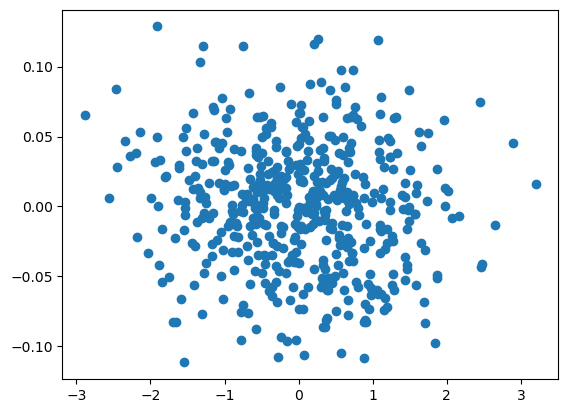

In [86]:
plt.scatter(Z[:,idx_c], X_transformed[:,indxMin])
corrcoef(Z[:,idx_c], X_transformed[:,indxMin])

In [87]:
N = x.shape[0]
N

500

In [88]:
# epchs:int, bs:int, reps:int, lr: float, job:int
num_epochs = 3000
report_freq = 30#num_epochs
num_reps = 5
batch_size = 100
batch_size2 = int(onp.floor(onp.min([onp.max([25, batch_size/1000*N]), 300])))
learning_rate = 0.001
job = 1
print("batch_size: ", batch_size2)

batch_size:  50


In [89]:
meta

{'rep': '100',
 'latents': 20,
 'confounder': 1,
 'proxy': 1000,
 'dist': 'gaussian',
 'distsd': '1',
 'noise': 'gaussian',
 'noisesd': 1.0,
 'independent': True,
 'noiseproxy': 1,
 'outdir': 'data_noisyproxy2',
 'ncl': 1,
 'size': 500,
 'ix': [9, 5, 18, 8, 4, 19],
 'iy': [2, 1, 13, 16, 3, 10],
 'ic': 20,
 'causal_coeff': 1.28520154347643,
 'coefx': [1.30660433368757,
  0.594351336127147,
  1.4071696435567,
  0.543512439820915,
  1.07543691410683,
  1.47539009526372,
  0.742164299124852],
 'coefy': [1.03866463666782,
  1.43202139018103,
  1.06534445844591,
  0.845704484265298,
  0.739768077386543,
  0.602315629832447,
  1.30118575179949]}

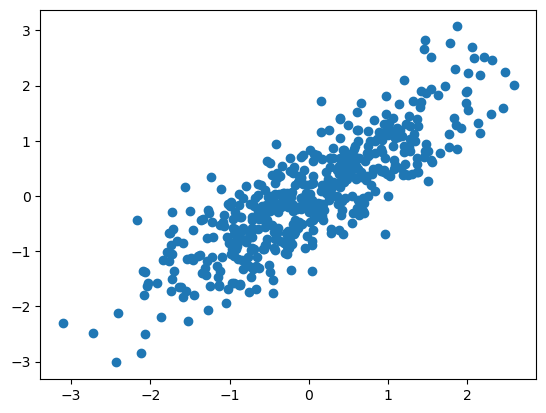

In [90]:
plt.scatter(x, y)

In [91]:
onp.corrcoef(x, y, rowvar=False)

array([[1.   , 0.839],
       [0.839, 1.   ]])

In [92]:
embedding = Isomap(n_components=10)
xy = onp.hstack([x, y])
xy_transformed = embedding.fit_transform(xy)
zc_ini = np.array(xy_transformed[:,3])[:,None]

In [93]:
hsicRBF(x, y)

DeviceArray(0.467, dtype=float32)

In [94]:
hsicRBF(zc_ini, y)

DeviceArray(0.069, dtype=float32)

In [95]:
hsicRBF(zc_ini, x)

DeviceArray(0.202, dtype=float32)

In [96]:
y.shape

(500, 1)

In [97]:
idx_x, idx_y, idx_c = idxs
    
zx_real = Z[:,idx_x]
zy_real = Z[:,idx_y]
zc_real = Z[:,idx_c]

In [98]:
idx_c

DeviceArray([20], dtype=int32)

In [99]:
type(lam)

jax.interpreters.xla.DeviceArray

In [100]:
# read in indices and beta real

In [101]:
nm = "test"

In [ ]:
res = getLatentZ_wrapper_lin(x, y, Z, U, idxs, stds, beta_real, nm, pars, num_epochs, report_freq, num_reps, batch_size, learning_rate, job)

nm: test


/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


alpha x shape:  (20, 11, 5)
N:  500
batch size:  100
batch per_epoch:  5
epochs2:  600
epochs eff:  600
num_iters:  3000
num_reports:  101
report_freq:  30
iteration:  0


In [ ]:
alpha_y_ini = onp.zeros((3, 3))
alpha_y_ini.shape

In [ ]:
alpha_y_ini

In [ ]:
res["params"]["alpha_c"][0:10]

In [ ]:
res["params"]["alpha_x"][0:10]

In [ ]:
res["params"]["alpha_y"][0:10]

In [ ]:
D_u = covariance_matrix(sqeuclidean_distance, U, U)
sigma_u = 1 / np.median(D_u)
K_u = rbf_kernel_matrix({'gamma': sigma_u}, U, U)

In [ ]:
rep = 0
zc_est = U@res["params"]["alpha_c"][:,0,rep][:,None]

In [ ]:
zc_est[0:10]

In [ ]:
plt.scatter(zc_real, zc_est)

In [ ]:
corrcoef(zc_real, zc_est)

In [ ]:
res.keys()

In [ ]:
beta

In [ ]:
res["path"].keys()

In [ ]:
res["path"]["loss"].shape

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["loss"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_indep"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_resids"][:,::,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mses"][:,:,0])

## resids

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_rx_ax"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_ry_ay"][:,:,0])

## indeps

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx_zy"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy_x"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["weight_orth"][:,:,0])

# mses

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_rx"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_ry"][:,:,0])

In [ ]:
np.std(y)

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_rx_cross"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_ry_cross"][:,:,0])

## zs vs z_est

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zc"][:,:,0])

In [ ]:
onp.mean([mse(x,x[onp.random.choice(x.shape[0], size=x.shape[0], replace=False)]) for i in range(1000)])

In [ ]:
onp.mean([mse(y,y[onp.random.choice(y.shape[0], size=y.shape[0], replace=False)]) for i in range(1000)])

In [ ]:
onp.sqrt(2)

In [ ]:
onp.random.choice(6, size=6, replace=False)

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["corr_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]), np.abs(res["path"]["stat_x"][:,:,0]))

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]), np.abs(res["path"]["stat_y"][:,:,0]))

In [ ]:
p_values_x =np.array([2*(1-stats.t.cdf(onp.abs(i[0]),(batch_size-2))) for i in res["path"]["stat_x"][:,:,0]])
p_values_y =np.array([2*(1-stats.t.cdf(onp.abs(i[0]),(batch_size-2))) for i in res["path"]["stat_y"][:,:,0]])
p_values = p_values_x+p_values_y

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]), p_values_x)
plt.plot(onp.arange(res["path"]["loss"].shape[0]), p_values_y)
plt.plot(onp.arange(res["path"]["loss"].shape[0]), p_values)


In [ ]:
x.shape

# cause estimation

In [ ]:
beta_real

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta_ce"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta_u"][:,:,0])
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta_x"][:,:,0])

## zc in zx and zy 

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["imp_zx"][:,0:7,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["imp_zy"][:,:,0])

# hsic(x, zc), hsic(y, zc)

In [ ]:
zx_real = Z[:,[7,1,2]]
zy_real = Z[:,[0,6,5]]
zc_real = Z[:,idx_c]

In [ ]:
hsicRBF(zc_real, x)

In [ ]:
hsicRBF(zc_real, y)

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_x_zc"][:,0:8,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_y_zc"][:,:,0])

## solution

In [ ]:
params = res["params"] 

In [ ]:
params["alpha_x"].shape

In [ ]:
params["alpha_y"].shape

In [ ]:
N = x.shape[0]
    

D_x = covariance_matrix(sqeuclidean_distance, x, x)
sigma_x_med = 1 / np.median(D_x)
K_x = rbf_kernel_matrix({'gamma': sigma_x_med}, x, x)

D_y = covariance_matrix(sqeuclidean_distance, y, y)
sigma_y = 1 / np.median(D_y)
K_y = rbf_kernel_matrix({'gamma': sigma_y}, y, y)
    
D_u = covariance_matrix(sqeuclidean_distance, U, U)
sigma_u = 1 / np.median(D_u)
K_u = rbf_kernel_matrix({'gamma': sigma_u}, U, U)

In [ ]:
Z.shape

In [ ]:
transformer = FastICA(n_components=Z.shape[1],random_state=0,whiten='unit-variance')
U_ica = transformer.fit_transform(onp.array(U))
U_ica.shape

In [ ]:
rep = 0
alpha_x = params["alpha_x"][:,:,rep]
alpha_y = params["alpha_y"][:,:,rep]
alpha_c = params["alpha_c"][:,:,rep]
    
zx = U_ica@alpha_x
zy = U_ica@alpha_y
zc = U@alpha_c
    
#zx = (zx - np.mean(zx)) / (np.std(zx))
#zy = (zy - np.mean(zy)) / (np.std(zy))
#zc = (zc - np.mean(zc)) / (np.std(zc))

#X_x = zc
#X_y = np.hstack([x,zc])
X_x = np.hstack([zx, zc])
X_y = np.hstack([x,zy, zc])
    
ws = np.ones(X_y.shape[1])
weights_y, resids_y, y_hat = rrModel(lam, X_y, y, ws)
ws = np.ones(X_x.shape[1])
weights_x, resids_x, x_hat = rrModel(lam, X_x, x, ws)

In [ ]:
weights_x

In [ ]:
weights_y

In [ ]:
plt.scatter(zc_real, zc)

In [ ]:
corrcoef(zc_real, zc)

In [ ]:
onp.abs(onp.corrcoef(zc_real, zc, rowvar=False)[0,1])

In [ ]:
plt.scatter(x, x_hat)

In [ ]:
ws = np.ones(U.shape[1])
_, _, xu_hat = rrModel(lam, U, x, ws)

In [ ]:
plt.scatter(x, xu_hat)

In [ ]:
np.max(y_hat)

In [ ]:
plt.scatter(y, y_hat)

In [ ]:
plt.scatter(y-y_hat, x)

In [ ]:
onp.corrcoef(x=y, y=y_hat, rowvar=False)[0,0]

In [ ]:
y_hat.shape

In [ ]:
ws = np.ones(U.shape[1])
weights_yu, resids_yu, yu_hat = rrModel(lam, U, y, ws)

In [ ]:
plt.scatter(y, yu_hat)

In [ ]:
ws = np.ones(x.shape[1])
_, _, yx_hat = rrModel(lam, x, y, ws)

In [ ]:
plt.scatter(y, yx_hat)

In [ ]:
ws = np.ones(x.shape[1])
_, _, yz_hat = rrModel(lam, zc, y, ws)

In [ ]:
plt.scatter(y, yz_hat)

In [ ]:
plt.scatter(zc, y-yz_hat)

In [ ]:
alpha_x = params["alpha_x"][:,:,rep]
alpha_y = params["alpha_y"][:,:,rep]
alpha_c = params["alpha_c"][:,:,rep]
    
zx = U_ica@alpha_x
zy = U_ica@alpha_y
zc = U@alpha_c

In [ ]:
zx.shape

In [ ]:
zy.shape

In [ ]:
plt.scatter(zx[:,0], x)

In [ ]:
plt.scatter(zc, x)

In [ ]:
plt.scatter(zx[:,3], y)

In [ ]:
plt.scatter(zy[:,2], y)

In [ ]:
plt.scatter(zc, y)